In [1]:
from astropy.io import fits, ascii
import numpy as np
import scipy
import matplotlib.pyplot as plt
import os
import glob
from astropy.time import Time
import astropy.table as at

In [73]:
iue_list = glob.glob('./1993J/MAST_2021-12-30T1746/IUE/*/*.fits')
spec_tab = at.Table([np.zeros(len(iue_list)),np.zeros(len(iue_list)),iue_list,iue_list], names = ('mjd','phase','fname', 'target') )
for i in spec_tab:
    hdul = fits.open(i['fname'])
    i['mjd'] = hdul[0].header['LJD-MID']
    i['phase'] = (hdul[0].header['LJD-MID']-2449076)/(1--0.000113)
    i['target'] = hdul[0].header['LTARGET']

spec_tab.sort('mjd')

In [91]:
spec_tab['phase'][ind_s].data

array([  0.70963981,   0.71966868,   1.04305214,   1.24922884,
         1.28178516,   1.68457964,   1.70216766,   1.77064992,
         2.08788407,   2.24498632,   2.61184486,   2.63432232,
         2.84652834,   3.45909912,   3.9239066 ,   4.05260206,
         4.96524893,   5.18242439,   5.64342229,   5.89209419,
         7.05916231,   8.94310943,   9.62620224,   9.6893851 ,
        11.81754462,  12.17847383,  15.92825011,  16.1778419 ,
        21.646044  ,  23.86745298,  32.25584509,  38.38604238,
        49.70287358,  50.05778347, 313.98750941])

In [ ]:
toadd: 3&4, 6&7   

In [79]:
spec_tab['target'].data

array(['SN IN M81', 'SN IN M81', 'SN 1993J', 'SN 1993J', 'SN 1993J',
       'SN 1993 J', 'SN 1993 J', 'SN 1993 J', 'SKY NEAR SN1993J',
       'SN 1993J', 'SN 1993J', 'SN 1993J', 'SN 1993J', 'SN 1993J',
       'SN 1993J', 'SN 1993J', 'SN 1993J', 'SN 1993J', 'SN 1993J',
       'SN1993J', 'SN 1993J', 'SN 1993J', 'SN 1993J', 'SN1993J',
       'SN1993J', 'SN 1993J', 'SKY BKGD', 'SN 1993J', 'SN 1993J',
       'SKY BKGD', 'SKY BKGD', 'SN 1993J', 'SN1993J', 'SN 1993J',
       'SKYBKGND', 'SN 1993J', 'SN 1993J', 'SN 1993J', 'SN 1993J',
       'SN 1993J'], dtype='<U62')

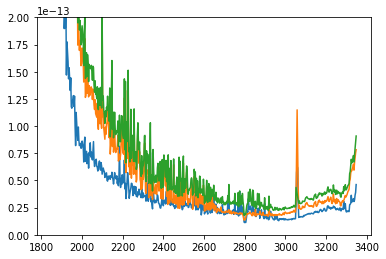

In [135]:
hdul1 = fits.open(spec_tab[ind_s][6]['fname'])
hdul2 = fits.open(spec_tab[ind_s][7]['fname'])
spec = at.Table(names = ['wavelength', 'flux', 'error'])
for i in range(len(hdul1[1].data['WAVE'][0])):
    if (hdul1[1].data['QUALITY'][0][i]>512)&(hdul2[1].data['QUALITY'][0][i]>512):
        pass
    elif hdul2[1].data['QUALITY'][0][i]>512:
        spec.add_row([hdul1[1].data['WAVE'][0][i], hdul1[1].data['FLUX'][0][i]*2,hdul1[1].data['SIGMA'][0][i]*2])
    elif hdul1[1].data['QUALITY'][0][i]>512:
        spec.add_row([hdul2[1].data['WAVE'][0][i], hdul2[1].data['FLUX'][0][i]*2,hdul2[1].data['SIGMA'][0][i]*2])
    else:
        spec.add_row([hdul2[1].data['WAVE'][0][i], 
                      hdul2[1].data['FLUX'][0][i]+hdul1[1].data['FLUX'][0][i],
                      np.sqrt(hdul1[1].data['SIGMA'][0][i]**2+hdul2[1].data['SIGMA'][0][i]**2)])
        
plt.plot(hdul1[1].data['WAVE'][0], 
        hdul1[1].data['SIGMA'][0])
plt.plot(hdul2[1].data['WAVE'][0], 
        hdul2[1].data['SIGMA'][0])
plt.plot(spec['wavelength'], spec['error'])
#plt.xlim(1700, 1900)
plt.ylim(0, 2e-13)

ascii.write(spec, './reduced_spectra/1993J/1993J_d1.7NUV_x1d.ascii')

In [142]:
spec_tab

mjd,phase,fname,target
float64,float64,str62,str62
2449076.70972,0.7096398108603681,./1993J/MAST_2021-12-30T1746/IUE/lwp25237/lwp25237mxlo_vo.fits,SN IN M81
2449076.71975,0.7196686776033435,./1993J/MAST_2021-12-30T1746/IUE/swp47385/swp47385mxlo_vo.fits,SN IN M81
2449077.04317,1.043052135069547,./1993J/MAST_2021-12-30T1746/IUE/lwp25239/lwp25239mxlo_vo.fits,SN 1993J
2449077.24937,1.2492288370009008,./1993J/MAST_2021-12-30T1746/IUE/swp47388/swp47388mxlo_vo.fits,SN 1993J
2449077.28193,1.2817851583326898,./1993J/MAST_2021-12-30T1746/IUE/swp47389/swp47389mxlo_vo.fits,SN 1993J
2449077.68477,1.6845796426675694,./1993J/MAST_2021-12-30T1746/IUE/swp47393/swp47393mxlo_vo.fits,SN 1993 J
2449077.70236,1.702167655050658,./1993J/MAST_2021-12-30T1746/IUE/lwp25242/lwp25242mxlo_vo.fits,SN 1993 J
2449077.77085,1.7706499165311198,./1993J/MAST_2021-12-30T1746/IUE/lwp25243/lwp25243mxlo_vo.fits,SN 1993 J
2449077.85082,1.8506108807882298,./1993J/MAST_2021-12-30T1746/IUE/lwp25244/lwp25244mxlo_vo.fits,SKY NEAR SN1993J


In [153]:
spec = at.Table(names = ['wavelength', 'flux', 'error'])

j = 0
for i in spec_tab[ind_s]:
    if j in [3,4,6,7]:
        j+=1
    else:
        hdul = fits.open(i['fname'])
        ind = hdul[1].data['QUALITY'][0]<16
        spec = at.Table([hdul[1].data['WAVE'][0][ind],hdul[1].data['FLUX'][0][ind],hdul[1].data['SIGMA'][0][ind]],
                        names = ['wavelength', 'flux', 'error'])
        if hdul[0].header['CAMERA'] == 'SWP':
            ascii.write(spec, './reduced_spectra/1993J/1993J_d{:.1f}FUV_x1d.ascii'.format(i['phase']))
        if hdul[0].header['CAMERA'] == 'LWP':
            ascii.write(spec, './reduced_spectra/1993J/1993J_d{:.1f}NUV_x1d.ascii'.format(i['phase']))
        j+=1

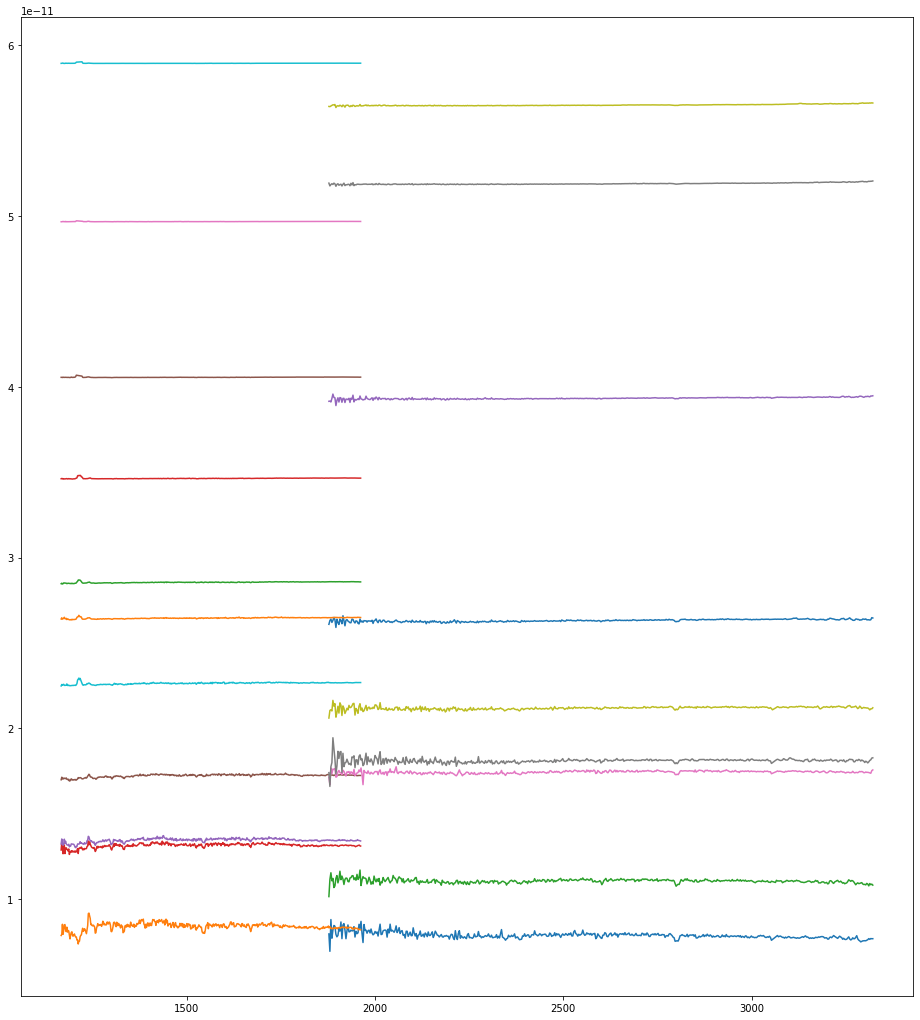

In [94]:
fig = plt.figure(figsize = (16, 18))

cutoff = 10
ind_s = np.ones(len(spec_tab))>0
ind_s[np.array([8,26,29,30,34])] = False
for i in spec_tab[ind_s][:-15]:
    hdul = fits.open(i['fname'])
    ind = hdul[1].data['QUALITY'][0]<16
    plt.plot(hdul[1].data['WAVE'][0][ind][cutoff:-cutoff], 
             hdul[1].data['FLUX'][0][ind][cutoff:-cutoff]+i['phase']*1e-11)


In [146]:
hdul = fits.open(spec_tab[2]['fname'])
hdul[1].data['WAVE']
#          dtype=(numpy.record, [('WAVE', '>f4', (563,)), ('FLUX', '>f4', (563,)), 
#          ('SIGMA', '>f4', (563,)), ('QUALITY', '>i2', (563,))]))


array([[1851.1864, 1853.8491, 1856.512 , 1859.1748, 1861.8375, 1864.5004,
        1867.1632, 1869.8259, 1872.4888, 1875.1516, 1877.8143, 1880.4772,
        1883.14  , 1885.8027, 1888.4656, 1891.1284, 1893.7911, 1896.454 ,
        1899.1167, 1901.7795, 1904.4424, 1907.1052, 1909.768 , 1912.4308,
        1915.0935, 1917.7563, 1920.4192, 1923.0819, 1925.7448, 1928.4076,
        1931.0703, 1933.7332, 1936.396 , 1939.0587, 1941.7216, 1944.3844,
        1947.0471, 1949.71  , 1952.3728, 1955.0355, 1957.6984, 1960.3611,
        1963.0239, 1965.6868, 1968.3496, 1971.0123, 1973.6752, 1976.3379,
        1979.0007, 1981.6636, 1984.3263, 1986.9891, 1989.652 , 1992.3147,
        1994.9775, 1997.6404, 2000.3031, 2002.966 , 2005.6288, 2008.2915,
        2010.9543, 2013.6172, 2016.2799, 2018.9427, 2021.6055, 2024.2683,
        2026.9312, 2029.594 , 2032.2567, 2034.9196, 2037.5823, 2040.2451,
        2042.908 , 2045.5708, 2048.2334, 2050.8962, 2053.559 , 2056.222 ,
        2058.8848, 2061.5476, 2064.210

In [2]:
hst_list = glob.glob('./1993J/MAST_2021-12-30T1746/HST/*/*x1d.fits')
hst_list

['./1993J/MAST_2021-12-30T1746/HST/lbq906g6q/lbq906g6q_x1d.fits',
 './1993J/MAST_2021-12-30T1746/HST/o5i230040/o5i230040_x1d.fits',
 './1993J/MAST_2021-12-30T1746/HST/o48z35020/o48z35020_x1d.fits',
 './1993J/MAST_2021-12-30T1746/HST/lbq906g4q/lbq906g4q_x1d.fits',
 './1993J/MAST_2021-12-30T1746/HST/o48z30050/o48z30050_x1d.fits',
 './1993J/MAST_2021-12-30T1746/HST/o48z30040/o48z30040_x1d.fits',
 './1993J/MAST_2021-12-30T1746/HST/lbq908qsq/lbq908qsq_x1d.fits',
 './1993J/MAST_2021-12-30T1746/HST/o5i230020/o5i230020_x1d.fits',
 './1993J/MAST_2021-12-30T1746/HST/o48z35010/o48z35010_x1d.fits',
 './1993J/MAST_2021-12-30T1746/HST/o48z30030/o48z30030_x1d.fits',
 './1993J/MAST_2021-12-30T1746/HST/o48z30020/o48z30020_x1d.fits',
 './1993J/MAST_2021-12-30T1746/HST/lbq907geq/lbq907geq_x1d.fits',
 './1993J/MAST_2021-12-30T1746/HST/o48z30010/o48z30010_x1d.fits',
 './1993J/MAST_2021-12-30T1746/HST/o5i230030/o5i230030_x1d.fits',
 './1993J/MAST_2021-12-30T1746/HST/o5i230060/o5i230060_x1d.fits',
 './1993J/

In [17]:
for i in hst_list:
    hdul = fits.open(i)
    print((hdul[1].header['EXPSTART']-49076)/(1--0.000113),hdul[0].header['TARGNAME'])

6940.56143511783 SN1993J
2576.064850731868 SN1993J-STIS
1789.489486298045 SN1993J-STIS
6940.495019282825 SN1993J
1844.4048433826958 SN1993J-STIS
1844.3603806269903 SN1993J-STIS
6951.794054351857 SN1993J
2575.976134086848 SN1993J-STIS
1789.452025341135 SN1993J-STIS
1844.31591824124 SN1993J-STIS
1844.2714554855272 SN1993J-STIS
6947.257228123223 SN1993J
1844.22699310978 SN1993J-STIS
2576.020411313524 SN1993J-STIS
2576.1553730928435 SN1993J-STIS
1844.4493057584502 SN1993J-STIS
6951.896576466861 SN1993J
2576.1133870972544 SN1993J-STIS
1789.5269472449593 SN1993J-STIS
6947.193624200464 SN1993J
6947.32625958267 SN1993J
2582.1246985590597 SN1993J-STIS
6951.963802570311 SN1993J
6940.428614566554 SN1993J
2582.19171617607 SN1993J-STIS
6951.830009918882 SN1993J
6947.152482919428 SN1993J
2582.0635825051772 SN1993J-STIS
2575.9341480912663 SN1993J-STIS


In [10]:
t = Time(5.952827162037E+04, format = 'mjd')
t.fits

'2021-11-10T06:31:08.000'

In [16]:
hdul[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS file may contain extensions               
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
ORIGIN  = 'HSTIO/CFITSIO March 2010' / FITS file originator                     
DATE    = '2018-07-04' / date this file was written (yyyy-mm-dd)                
NEXTEND =                    1 / Number of extensions                           
FILENAME= 'o5i230010_x1d.fits' / name of file                                   
FILETYPE= 'SCI      '          / type of data found in data file                
                                                                                
TELESCOP= 'HST'             

In [19]:
hst_list = glob.glob('./1993J/MAST_2021-12-30T1746/HST/*/*x1d.fits')
spec_tab = at.Table([np.zeros(len(hst_list)),np.zeros(len(hst_list)),hst_list,hst_list], names = ('mjd','phase','fname', 'target') )
for i in spec_tab:
    hdul = fits.open(i['fname'])
    i['mjd'] = hdul[1].header['EXPSTART']
    i['phase'] = (hdul[1].header['EXPSTART']-49076)/(1--0.000113)
    i['target'] = hdul[0].header['TARGNAME']

spec_tab.sort('mjd')

In [77]:
spec_tab[21]

mjd,phase,fname,target
float64,float64,str61,str61
56023.93751115,6947.152482919428,./1993J/MAST_2021-12-30T1746/HST/lbq907fxq/lbq907fxq_x1d.fits,SN1993J


In [28]:
spec_tab['phase'].data
#to bin
#stis: 0:3, NUV, 3:9, FUV, 9:15, FUV, 15:18, NUV 
#COS: 18:21, G140L, single? 21:25, G230L, 25:29, G230L
#the late time COS spectra look confusing, and also S/N very low

array([1789.45202534, 1789.4894863 , 1789.52694724, 1844.22699311,
       1844.27145549, 1844.31591824, 1844.36038063, 1844.40484338,
       1844.44930576, 2575.93414809, 2575.97613409, 2576.02041131,
       2576.06485073, 2576.1133871 , 2576.15537309, 2582.06358251,
       2582.12469856, 2582.19171618, 6940.42861457, 6940.49501928,
       6940.56143512, 6947.15248292, 6947.1936242 , 6947.25722812,
       6947.32625958, 6951.79405435, 6951.83000992, 6951.89657647,
       6951.96380257])

1302.3284371572076 1811.5918723535754
2405.8905122345946 2902.6685836882407
1771.2238137287 2018.805391334731
COS G230L 2635
1302.3768102211677 1811.636770037837
2405.7709184067426 2902.549236262845
1771.2346803392504 2018.8160099265642
COS G230L 2635
2054.5697412087043 2552.073567078481
3143.868494493348 3640.0388108174593
2140.9496849742027 2387.332173980571
COS G230L 3360
2054.559824292947 2552.063667358611
3143.8906595883623 3640.0610177102185
2140.9729197864626 2387.3553877837057
COS G230L 3360


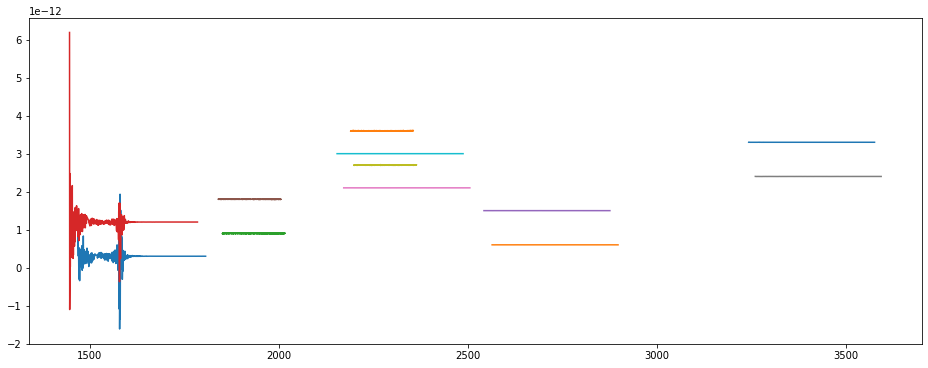

In [154]:
fig = plt.figure(figsize = (16, 6))

cutoff = 1
ind_s = np.ones(len(spec_tab))>0
#ind_s[np.array([8,26,29,30,34])] = False
j = 1
for i in spec_tab[ind_s][25:29]:
    hdul = fits.open(i['fname'])
#    if hdul[0].header['INSTRUME']=='COS':
    for tab in hdul[1].data:
        ind = tab['DQ']<4
        plt.plot(tab['WAVELENGTH'][ind][cutoff:-cutoff], 
                 tab['FLUX'][ind][cutoff:-cutoff]+j*3e-13)
        print(min(tab['WAVELENGTH']), max(tab['WAVELENGTH']))
        j+=1
    print(hdul[0].header['INSTRUME'],  hdul[0].header['OPT_ELEM'], hdul[0].header['CENWAVE'])
#        plt.axvline(hdul[0].header['CENWAVE'])
#
#plt.ylim(0, 3e-13)

In [151]:
hdul1 = fits.open(spec_tab[ind_s][27]['fname'])
hdul1[1].data[0]['WAVELENGTH'][-10:]

array([2548.56008729, 2548.95047663, 2549.34086529, 2549.73125328,
       2550.1216406 , 2550.51202724, 2550.90241321, 2551.29279851,
       2551.68318313, 2552.07356708])

In [95]:
spec_tab[ind_s][15:18]
#to bin
#stis: 0:3, NUV, 3:9, FUV, 9:15, FUV, 15:18, NUV 
#COS: 18:21, G140L, single? 21:25, G230L, 25:27, 27:29, G230L
#the late time COS spectra look confusing, and also S/N very low
#marked them as NUV1,2,3

mjd,phase,fname,target
float64,float64,str61,str61
51658.35535569,2582.0635825051772,./1993J/MAST_2021-12-30T1746/HST/o5i235010/o5i235010_x1d.fits,SN1993J-STIS
51658.41647865,2582.1246985590597,./1993J/MAST_2021-12-30T1746/HST/o5i235020/o5i235020_x1d.fits,SN1993J-STIS
51658.48350384,2582.19171617607,./1993J/MAST_2021-12-30T1746/HST/o5i235030/o5i235030_x1d.fits,SN1993J-STIS


In [79]:
import scipy.interpolate as si

(-1e-16, 3e-15)

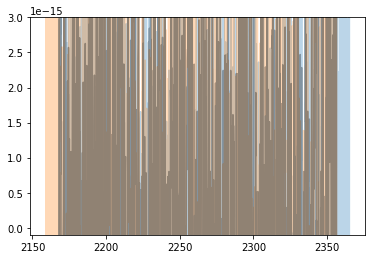

In [168]:
hdul1 = fits.open(spec_tab[ind_s][27]['fname'])
hdul2 = fits.open(spec_tab[ind_s][28]['fname'])
#hdul3 = fits.open(spec_tab[ind_s][27]['fname'])
#hdul4 = fits.open(spec_tab[ind_s][28]['fname'])
#hdul5 = fits.open(spec_tab[ind_s][13]['fname'])
#hdul6 = fits.open(spec_tab[ind_s][14]['fname'])

index = 2
ind_1 = hdul1[1].data[index]['DQ']<20
ind_2 = hdul2[1].data[index]['DQ']<20
#ind_3 = hdul3[1].data[index]['DQ']<20
#ind_4 = hdul4[1].data[index]['DQ']<20
#ind_5 = hdul5[1].data[index]['DQ']<4
#ind_6 = hdul6[1].data[index]['DQ']<4

spec1_func = si.interp1d(hdul1[1].data[index]['WAVELENGTH'][ind_1],hdul1[1].data[index]['FLUX'][ind_1])
spec1_func_err = si.interp1d(hdul1[1].data[index]['WAVELENGTH'][ind_1],hdul1[1].data[index]['ERROR'][ind_1])
spec2_func = si.interp1d(hdul2[1].data[index]['WAVELENGTH'][ind_2],hdul2[1].data[index]['FLUX'][ind_2])
spec2_func_err = si.interp1d(hdul2[1].data[index]['WAVELENGTH'][ind_2],hdul2[1].data[index]['ERROR'][ind_2])
#spec3_func = si.interp1d(hdul3[1].data[index]['WAVELENGTH'][ind_3],hdul3[1].data[index]['FLUX'][ind_3])
#spec3_func_err = si.interp1d(hdul3[1].data[index]['WAVELENGTH'][ind_3],hdul3[1].data[index]['ERROR'][ind_3])
#spec4_func = si.interp1d(hdul4[1].data[index]['WAVELENGTH'][ind_4],hdul4[1].data[index]['FLUX'][ind_4])
#spec4_func_err = si.interp1d(hdul4[1].data[index]['WAVELENGTH'][ind_4],hdul4[1].data[index]['ERROR'][ind_4])
#spec5_func = si.interp1d(hdul5[1].data[index]['WAVELENGTH'][ind_5],hdul5[1].data[index]['FLUX'][ind_5])
#spec5_func_err = si.interp1d(hdul5[1].data[index]['WAVELENGTH'][ind_5],hdul5[1].data[index]['ERROR'][ind_5])
#spec6_func = si.interp1d(hdul6[1].data[index]['WAVELENGTH'][ind_6],hdul6[1].data[index]['FLUX'][ind_6])
#spec6_func_err = si.interp1d(hdul6[1].data[index]['WAVELENGTH'][ind_6],hdul6[1].data[index]['ERROR'][ind_6])

min_wav = max(min(hdul1[1].data[index]['WAVELENGTH'][ind_1]),
              min(hdul2[1].data[index]['WAVELENGTH'][ind_2]),
#             min(hdul3[1].data[index]['WAVELENGTH'][ind_3]),
#             min(hdul4[1].data[index]['WAVELENGTH'][ind_4]),
#             min(hdul5[1].data[index]['WAVELENGTH'][ind_5]),
#             min(hdul6[1].data[index]['WAVELENGTH'][ind_6])
             )
max_wav = min(max(hdul1[1].data[index]['WAVELENGTH'][ind_1]),
              max(hdul2[1].data[index]['WAVELENGTH'][ind_2]),
#             max(hdul3[1].data[index]['WAVELENGTH'][ind_3]),
#             max(hdul4[1].data[index]['WAVELENGTH'][ind_4]),
#             max(hdul5[1].data[index]['WAVELENGTH'][ind_5]),
#             max(hdul6[1].data[index]['WAVELENGTH'][ind_6])
             )

wav_ind = (hdul1[1].data[index]['WAVELENGTH']<max_wav)&(hdul1[1].data[index]['WAVELENGTH']>min_wav)
wav = hdul1[1].data[index]['WAVELENGTH'][wav_ind]

flux = spec1_func(wav)+spec2_func(wav)#+spec3_func(wav)+spec4_func(wav)+spec5_func(wav)+spec6_func(wav)
error = np.sqrt(spec1_func_err(wav)**2+spec2_func_err(wav)**2)#+spec3_func_err(wav)**2+spec4_func_err(wav)**2)#+spec5_func_err(wav)**2+spec6_func_err(wav)**2)

spec = at.Table([wav, flux, error], names = ['wavelength', 'flux', 'error'])

ascii.write(spec, './reduced_spectra/1993J/1993J_d{:.0f}NUV6_x1d.ascii'.format(spec_tab[ind_s][27]['phase']),
           overwrite = False)

plt.plot(hdul1[1].data[index]['WAVELENGTH'][ind_1],hdul1[1].data[index]['FLUX'][ind_1], alpha = 0.3)
plt.plot(hdul2[1].data[index]['WAVELENGTH'][ind_2],hdul2[1].data[index]['FLUX'][ind_2], alpha = 0.3)
#plt.plot(hdul3[1].data[index]['WAVELENGTH'][ind_3],hdul3[1].data[index]['FLUX'][ind_3], alpha = 0.3)
#plt.plot(hdul4[1].data[index]['WAVELENGTH'][ind_4],hdul4[1].data[index]['FLUX'][ind_4], alpha = 0.3)
#plt.plot(hdul5[1].data[index]['WAVELENGTH'][ind_5],hdul5[1].data[index]['FLUX'][ind_5], alpha = 0.5)
#plt.plot(hdul6[1].data[index]['WAVELENGTH'][ind_6],hdul6[1].data[index]['FLUX'][ind_6], alpha = 0.5)

plt.plot(wav, flux/2, color = 'k', alpha = 0.3)
#plt.xlim(1700, 1900)
plt.ylim(-1e-16, 3e-15)
# d 6940 huge noise

In [173]:
hdul[0].header

SIMPLE  =                    T / FITS STANDARD                                  
BITPIX  =                  -32 / FITS BITS/PIXEL                                
NAXIS   =                    2 / NUMBER OF AXES                                 
NAXIS1  =                 2064 /                                                
NAXIS2  =                   11 /                                                
EXTEND  =                    T / There maybe standard extensions                
BSCALE  =                1.0E0 / REAL = TAPE*BSCALE + BZERO                     
BZERO   =                0.0E0 /                                                
OPSIZE  =                  832 / PSIZE of original image                        
ORIGIN  = 'STScI-STSDAS'       / Fitsio version 21-Feb-1996                     
FITSDATE= '2004-02-20'         / Date FITS file was created                     
FILENAME= 'y1660204t_cvt.c0h'  / Original filename                              
ALLG-MAX=           3.277233

In [177]:
hst_list2 = glob.glob('./1993J/MAST_2021-12-30T1746/HST/*/*c0f.fits')
spec_tab = at.Table([np.zeros(len(hst_list2)),np.zeros(len(hst_list2)),hst_list2,hst_list2, hst_list2], names = ('mjd','phase','fname', 'target', 'instrument') )
for i in spec_tab:
    hdul = fits.open(i['fname'])
    i['mjd'] = hdul[0].header['EXPSTART']
    i['phase'] = (hdul[0].header['EXPSTART']-49076)/(1--0.000113)
    i['target'] = hdul[0].header['TARGNAME']
    i['instrument'] = hdul[0].header['INSTRUME']
spec_tab.sort('mjd')

In [181]:
spec_tab['phase'].data
#so, here are FOS spectra
#first two, HRS,
#2:5, 5:10, 10:16, 16:20, 20:22, 22:24

array([   9.36769805,    9.88770873,   16.36915204,   16.435626  ,
         16.50237685,  171.06063514,  171.07983436,  171.12634531,
        171.14554453,  171.19314304,  229.01813024,  229.08294931,
        229.15073101,  229.22076938,  229.29181374,  229.35912962,
        667.81485056,  667.83188795,  667.87894154,  667.89408948,
       1060.22619199, 1060.33469752, 1396.24724305, 1396.53474598])

In [228]:
hdul1 = fits.open(spec_tab[2]['fname'])

for i in hdul1[0].data[0]:
    print(i)

2424.0796
2422.3374
2420.5957
2418.8542
2417.113
2415.3723
2413.6318
2411.8916
2410.1519
2408.4124
2406.673
2404.9343
2403.1958
2401.4575
2399.7197
2397.9822
2396.2449
2394.5078
2392.7712
2391.035
2389.299
2387.5632
2385.828
2384.093
2382.3582
2380.6238
2378.8896
2377.1558
2375.422
2373.689
2371.956
2370.2234
2368.491
2366.7588
2365.027
2363.2957
2361.5645
2359.8335
2358.1028
2356.3726
2354.6423
2352.9126
2351.183
2349.4539
2347.7249
2345.9963
2344.2678
2342.5396
2340.8118
2339.0842
2337.357
2335.6296
2333.9028
2332.1763
2330.4502
2328.724
2326.9983
2325.2727
2323.5474
2321.8225
2320.0977
2318.373
2316.649
2314.9248
2313.2012
2311.4775
2309.7542
2308.0312
2306.3083
2304.5857
2302.8635
2301.1414
2299.4194
2297.6978
2295.9763
2294.2551
2292.5342
2290.8135
2289.093
2287.3726
2285.6526
2283.9326
2282.2131
2280.4937
2278.7744
2277.0554
2275.3367
2273.6182
2271.8997
2270.1816
2268.4636
2266.7458
2265.0283
2263.3108
2261.5938
2259.8767
2258.16
2256.4434
2254.727
2253.0107
2251.295
2249.579
22

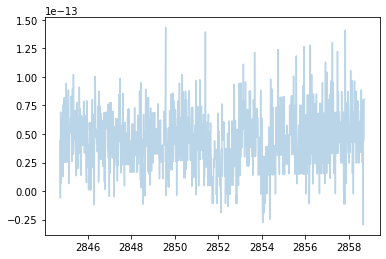

In [215]:
#for c1f files we just need the last one....
hdul1 = fits.open(spec_tab[1]['fname'])
hdul2 = fits.open(spec_tab[1]['fname'][:-8]+'c1f.fits')

#for i in range(len(hdul2[0].data)):
plt.plot(hdul1[0].data[-1],hdul2[0].data[-1], alpha = 0.3)
#plt.ylim(5.5e-15, 1.3e-14)
#plt.xlim(1500, 2500)

2791.0959468207207 2806.0454501979943
FOS
2844.7322297081737 2858.710065421059
FOS
901.53406 2424.0796
FOS
2222.2852 3277.233
FOS
3235.4211 4781.448
FOS
901.53406 2424.0796
FOS
901.53406 2424.0796
FOS
2222.2852 3277.233
FOS
2222.2852 3277.233
FOS
3235.4211 4781.448
FOS
901.53406 2424.0796
FOS
901.53406 2424.0796
FOS
2222.2852 3277.233
FOS
2222.2852 3277.233
FOS
3235.4211 4781.448
FOS
3235.4211 4781.448
FOS
2222.2852 3277.233
FOS
2222.2852 3277.233
FOS
3235.4211 4781.448
FOS
3235.4211 4781.448
FOS
901.1507 2508.6914
FOS
2221.481 3300.9482
FOS
901.1507 2508.6914
FOS
2221.481 3300.9482
FOS


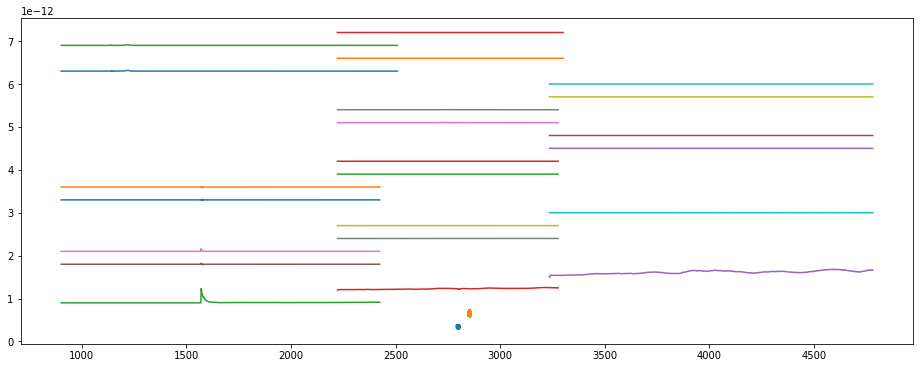

In [229]:
fig = plt.figure(figsize = (16, 6))

cutoff = 1
ind_s = np.ones(len(spec_tab))>0
#ind_s[np.array([8,26,29,30,34])] = False
j = 1
for i in spec_tab:
    hdul1 = fits.open(i['fname'])
    ind = hdul1[0].data[-1]>0
    hdul2 = fits.open(i['fname'][:-8]+'c1f.fits')
    plt.plot(hdul1[0].data[-1][ind],hdul2[0].data[-1][ind]+j*3e-13)
    print(min(hdul1[0].data[-1][ind]), max(hdul1[0].data[-1][ind]))
    j+=1
    print(hdul[0].header['INSTRUME'])
#        plt.axvline(hdul[0].header['CENWAVE'])
#
#plt.ylim(0, 3e-13)


In [237]:
hdul1 = fits.open(spec_tab[6]['fname'])

print(hdul1[0].data[-1])
#so, here are FOS spectra
#first two, HRS,
#2:5, 5:10, 10:16, 16:20, 20:22, 22:24
#2, FUV, 3, NUV, 4, optical
#5:7, FUV, 7:9, NUV, 9, optical
#10:12, FUV, 12:14, NUV, 14:16, optical
#16:18, NUV, 18:20, optical
#20, FUV, 21, NUV, 22, FUV, 23, NUV

[2424.0796 2422.3374 2420.5957 ...    0.        0.        0.    ]


In [263]:
index = 23
i = spec_tab[index]
hdul1 = fits.open(i['fname'])
ind = hdul1[0].data[-1]>0
hdul2 = fits.open(i['fname'][:-8]+'c1f.fits')
hdul3 = fits.open(i['fname'][:-8]+'c2f.fits')


spec = at.Table([hdul1[0].data[-1][ind], hdul2[0].data[-1][ind], hdul3[0].data[-1][ind]], 
                names = ['wavelength', 'flux', 'error'])
ascii.write(spec, './reduced_spectra/1993J/1993J_d{:.0f}NUV_x1d.ascii'.format(i['phase']),
           overwrite = False)


(-1e-16, 3e-15)

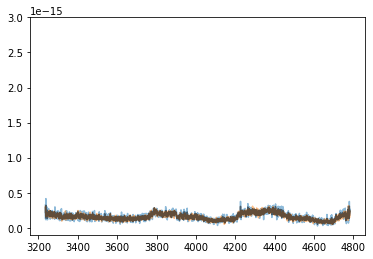

In [259]:
index1 = 18
i = spec_tab[index1]
hdul1 = fits.open(i['fname'])
ind = hdul1[0].data[-1]>0
hdul2 = fits.open(i['fname'][:-8]+'c1f.fits')
hdul3 = fits.open(i['fname'][:-8]+'c2f.fits')

index2 = 19
i = spec_tab[index2]
hdul4 = fits.open(i['fname'])
ind = hdul4[0].data[-1]>0
hdul5 = fits.open(i['fname'][:-8]+'c1f.fits')
hdul6 = fits.open(i['fname'][:-8]+'c2f.fits')

spec = at.Table([hdul1[0].data[-1][ind], hdul2[0].data[-1][ind]+hdul5[0].data[-1][ind], 
                 np.sqrt(hdul3[0].data[-1][ind]**2+hdul6[0].data[-1][ind]**2)], 
                names = ['wavelength', 'flux', 'error'])
ascii.write(spec, './reduced_spectra/1993J/1993J_d{:.0f}OPTICAL_x1d.ascii'.format(i['phase']),
        overwrite = False)
plt.plot(hdul1[0].data[-1][ind],hdul2[0].data[-1][ind], alpha = 0.5)
plt.plot(hdul4[0].data[-1][ind],hdul5[0].data[-1][ind], alpha = 0.5)

plt.plot(spec['wavelength'], spec['flux']/2, color = 'k', alpha = 0.5)

plt.ylim(-1e-16, 3e-15)

In [ ]:

hdul1 = fits.open(spec_tab[ind_s][27]['fname'])
hdul2 = fits.open(spec_tab[ind_s][28]['fname'])
#hdul3 = fits.open(spec_tab[ind_s][27]['fname'])
#hdul4 = fits.open(spec_tab[ind_s][28]['fname'])
#hdul5 = fits.open(spec_tab[ind_s][13]['fname'])
#hdul6 = fits.open(spec_tab[ind_s][14]['fname'])

index = 2
ind_1 = hdul1[1].data[index]['DQ']<20
ind_2 = hdul2[1].data[index]['DQ']<20
#ind_3 = hdul3[1].data[index]['DQ']<20
#ind_4 = hdul4[1].data[index]['DQ']<20
#ind_5 = hdul5[1].data[index]['DQ']<4
#ind_6 = hdul6[1].data[index]['DQ']<4

spec1_func = si.interp1d(hdul1[1].data[index]['WAVELENGTH'][ind_1],hdul1[1].data[index]['FLUX'][ind_1])
spec1_func_err = si.interp1d(hdul1[1].data[index]['WAVELENGTH'][ind_1],hdul1[1].data[index]['ERROR'][ind_1])
spec2_func = si.interp1d(hdul2[1].data[index]['WAVELENGTH'][ind_2],hdul2[1].data[index]['FLUX'][ind_2])
spec2_func_err = si.interp1d(hdul2[1].data[index]['WAVELENGTH'][ind_2],hdul2[1].data[index]['ERROR'][ind_2])
#spec3_func = si.interp1d(hdul3[1].data[index]['WAVELENGTH'][ind_3],hdul3[1].data[index]['FLUX'][ind_3])
#spec3_func_err = si.interp1d(hdul3[1].data[index]['WAVELENGTH'][ind_3],hdul3[1].data[index]['ERROR'][ind_3])
#spec4_func = si.interp1d(hdul4[1].data[index]['WAVELENGTH'][ind_4],hdul4[1].data[index]['FLUX'][ind_4])
#spec4_func_err = si.interp1d(hdul4[1].data[index]['WAVELENGTH'][ind_4],hdul4[1].data[index]['ERROR'][ind_4])
#spec5_func = si.interp1d(hdul5[1].data[index]['WAVELENGTH'][ind_5],hdul5[1].data[index]['FLUX'][ind_5])
#spec5_func_err = si.interp1d(hdul5[1].data[index]['WAVELENGTH'][ind_5],hdul5[1].data[index]['ERROR'][ind_5])
#spec6_func = si.interp1d(hdul6[1].data[index]['WAVELENGTH'][ind_6],hdul6[1].data[index]['FLUX'][ind_6])
#spec6_func_err = si.interp1d(hdul6[1].data[index]['WAVELENGTH'][ind_6],hdul6[1].data[index]['ERROR'][ind_6])

min_wav = max(min(hdul1[1].data[index]['WAVELENGTH'][ind_1]),
              min(hdul2[1].data[index]['WAVELENGTH'][ind_2]),
#             min(hdul3[1].data[index]['WAVELENGTH'][ind_3]),
#             min(hdul4[1].data[index]['WAVELENGTH'][ind_4]),
#             min(hdul5[1].data[index]['WAVELENGTH'][ind_5]),
#             min(hdul6[1].data[index]['WAVELENGTH'][ind_6])
             )
max_wav = min(max(hdul1[1].data[index]['WAVELENGTH'][ind_1]),
              max(hdul2[1].data[index]['WAVELENGTH'][ind_2]),
#             max(hdul3[1].data[index]['WAVELENGTH'][ind_3]),
#             max(hdul4[1].data[index]['WAVELENGTH'][ind_4]),
#             max(hdul5[1].data[index]['WAVELENGTH'][ind_5]),
#             max(hdul6[1].data[index]['WAVELENGTH'][ind_6])
             )

wav_ind = (hdul1[1].data[index]['WAVELENGTH']<max_wav)&(hdul1[1].data[index]['WAVELENGTH']>min_wav)
wav = hdul1[1].data[index]['WAVELENGTH'][wav_ind]

flux = spec1_func(wav)+spec2_func(wav)#+spec3_func(wav)+spec4_func(wav)+spec5_func(wav)+spec6_func(wav)
error = np.sqrt(spec1_func_err(wav)**2+spec2_func_err(wav)**2)#+spec3_func_err(wav)**2+spec4_func_err(wav)**2)#+spec5_func_err(wav)**2+spec6_func_err(wav)**2)

spec = at.Table([wav, flux, error], names = ['wavelength', 'flux', 'error'])

ascii.write(spec, './reduced_spectra/1993J/1993J_d{:.0f}NUV6_x1d.ascii'.format(spec_tab[ind_s][27]['phase']),
           overwrite = False)

plt.plot(hdul1[1].data[index]['WAVELENGTH'][ind_1],hdul1[1].data[index]['FLUX'][ind_1], alpha = 0.3)
plt.plot(hdul2[1].data[index]['WAVELENGTH'][ind_2],hdul2[1].data[index]['FLUX'][ind_2], alpha = 0.3)
#plt.plot(hdul3[1].data[index]['WAVELENGTH'][ind_3],hdul3[1].data[index]['FLUX'][ind_3], alpha = 0.3)
#plt.plot(hdul4[1].data[index]['WAVELENGTH'][ind_4],hdul4[1].data[index]['FLUX'][ind_4], alpha = 0.3)
#plt.plot(hdul5[1].data[index]['WAVELENGTH'][ind_5],hdul5[1].data[index]['FLUX'][ind_5], alpha = 0.5)
#plt.plot(hdul6[1].data[index]['WAVELENGTH'][ind_6],hdul6[1].data[index]['FLUX'][ind_6], alpha = 0.5)

plt.plot(wav, flux/2, color = 'k', alpha = 0.3)
#plt.xlim(1700, 1900)
plt.ylim(-1e-16, 3e-15)
# d 6940 huge noise

In [ ]:
hst_list98S = glob.glob('./reduced_spectra/1998S/')

In [ ]:
hst_list2 = glob.glob('./1993J/MAST_2021-12-30T1746/HST/*/*c0f.fits')
spec_tab = at.Table([np.zeros(len(hst_list2)),np.zeros(len(hst_list2)),hst_list2,hst_list2, hst_list2], names = ('mjd','phase','fname', 'target', 'instrument') )
for i in spec_tab:
    hdul = fits.open(i['fname'])
    i['mjd'] = hdul[0].header['EXPSTART']
    i['phase'] = (hdul[0].header['EXPSTART']-49076)/(1--0.000113)
    i['target'] = hdul[0].header['TARGNAME']
    i['instrument'] = hdul[0].header['INSTRUME']
spec_tab.sort('mjd')

In [ ]:
ascii.write(spec, './reduced_spectra/1993J/1993J_d{:.0f}OPTICAL_x1d.ascii'.format(i['phase']),
        overwrite = False)
